In [1]:
from tools.HierarchicalClustering import HierarchicalClustering
# 4.2
hic = HierarchicalClustering(feature='real', suppress_progress=True)
hic.distance_threshold = 2.5

hic.cluster_all()
hic.get_scores()    

AUC score: 0.9865730524908058


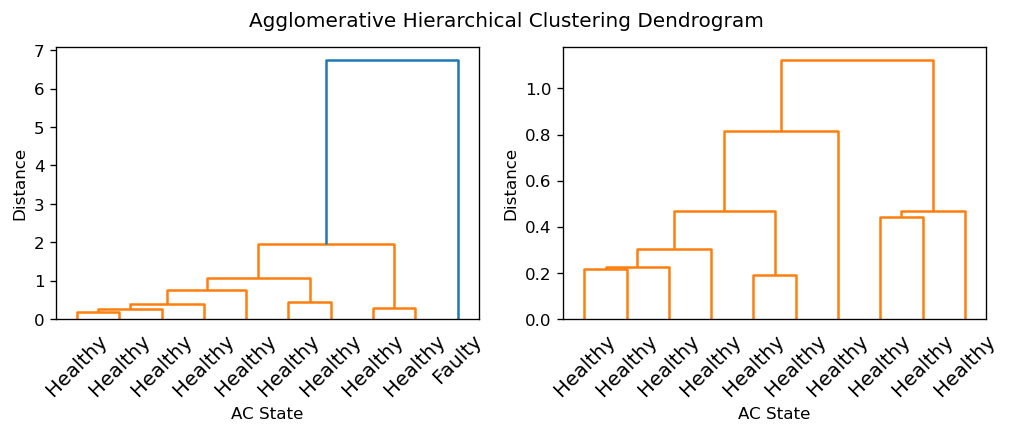

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def plot_dendrogram(row):
    x_row, y_row = hic.get_X_Y(row)
    linked = linkage(x_row, hic.linkage)
    labelList = ['Faulty' if x else 'Healthy' for x in y_row]
    plt1 = dendrogram(linked,
                orientation='top',
                leaf_rotation=45,
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True,
                color_threshold=hic.distance_threshold)
    return plt1

plt.figure(figsize=(10, 3), dpi=120)
plt.suptitle('Agglomerative Hierarchical Clustering Dendrogram')

plt.subplot(1, 2, 1)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt1 = plot_dendrogram(4)


plt.subplot(1, 2, 2)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt2 = plot_dendrogram(0)

In [3]:
# 4.3
from tools.KNN import KNN
knn = KNN(feature='all', suppress_progress=True)
knn.cluster_all()
knn.get_scores()

AUC score: 0.9462019391507858


In [4]:
# 4.4
from tools.LOF import LOF
lof = LOF(feature='all', suppress_progress=True)
lof.cluster_all()
lof.get_scores()

AUC score: 0.9857438983617519


In [9]:
# 4.5
from tools.SVMOneClass import SVMOneClass
for feature in ['all','real','reactive','harmonic']:
    svm = SVMOneClass(feature=feature, suppress_progress=True)
    svm.nu = 0.99
    svm.cluster_all()
    svm.get_scores()

AUC score: 0.9745971247074556
AUC score: 0.9637746573052491
AUC score: 0.9769709127382147
AUC score: 0.9570511534603812


In [6]:
# 4.6
from tools.Iforest import Iforest
ifo = Iforest(feature='real', suppress_progress=True)
ifo.cluster_all()
ifo.get_scores()

AUC score: 0.9703426947509194


In [7]:
# 4.7
from tools.Inne import Inne
inne = Inne(feature='harmonic', suppress_progress=True)
inne.cluster_all()
inne.get_scores()

AUC score: 0.9392076228686058
